# Table of Contents <a id='back'></a>

* [1. Initiation](#inicio)
    * [1.1 Loading of all libraries](#carrega)
    * [1.2 Exploring the data](#correcao)  
    * [1.3 Missing Values](#analise)
    * [1.4 Data enrichment](#dados) 
* [2. Data Analysis](#eventos)
    * [2.1 Top Goalscorers](#num)
    * [2.2 Top Assisters](#di)
    * [2.3 Contribution for Goal](#per)
    * [2.4 Time needed to score a goal](#funil)
    * [2.5 Time needed to assist](#tipos)
    * [2.6 Top 20 Players by Total Goal Contribution per minute (Goals + Assists)](#prox)
    * [2.7 Players with most yellow cards](#aprox)
    * [2.8 Players with most red cards](#do)
    * [2.9 Players with most cards (Yellow / Red)](#distr) 
* [3. Contribution per year of the 3 best players (Goals / Assists)](#dia)
* [4. Sporting Clube de Portugal](#ab)
    * [4.1 Average stadium assistance 2012-2023](#sp)
    * [4.2 Players Market Value 2023](#scp)
* [5. Conclusion](#final)

This dataset was downloaded on Kaggle and it contains football player data scraped from Transfermarkt, that is updated weekly. It includes information on over 60,000 games played across multiple seasons and major competitions, with details on over 400 clubs and 30,000 players.

The objective of this study, in the first instance is to make some statistical analyses to understand:

- Who are the 20 players that scored more goals

- Who are the 20 players that assisted more times

- Who has more contribution to goals

- Who are the 20 players that need less time to score a goal

- Who are the 20 players that need less time to assist someone to score

- Top 20 players that got more yellow cards

- Top 20 players that got more red cards

- Top 20 players with more card combination.

In a second instance I'm going to analyze Sporting Clube de Portugal. For some people that don't know much about this club, it's the club where golden ball winners Cristiano Ronaldo and Luis Figo started to play, it was also the first professional club for so many players as Nani, Quaresma, Joao Moutinho , Rafael Leao etc. 

# 1. Initiation <a id='inicio'></a>

## 1.1 Loading of all libraries <a id='carrega'></a>

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np
from scipy import stats as st
import seaborn as sns
import plotly.express as px

## 1.2 Exploring the data <a id='correcao'></a>

In [195]:
presencas = pd.read_csv('/Users/andrewferreira/Downloads/archive (1)/appearances.csv')
presencas.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [196]:
presencas['competition_id'].unique()

array(['CLQ', 'ELQ', 'UKRS', 'RUP', 'UKR1', 'DK1', 'RUSS', 'RU1', 'BESC',
       'UKRP', 'BE1', 'FRCH', 'POCP', 'SC1', 'NLSC', 'CIT', 'FR1', 'NL1',
       'SCI', 'POSU', 'DFL', 'GBCS', 'DFB', 'TR1', 'PO1', 'GB1', 'ES1',
       'SUC', 'L1', 'GR1', 'IT1', 'CDR', 'DKP', 'USC', 'CL', 'EL', 'NLP',
       'SFA', 'GRP', 'FAC', 'KLUB', 'ECLQ', 'CGB'], dtype=object)

In [197]:
presencas.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524126 entries, 0 to 1524125
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1524126 non-null  object
 1   game_id                 1524126 non-null  int64 
 2   player_id               1524126 non-null  int64 
 3   player_club_id          1524126 non-null  int64 
 4   player_current_club_id  1524126 non-null  int64 
 5   date                    1524126 non-null  object
 6   player_name             1524125 non-null  object
 7   competition_id          1524126 non-null  object
 8   yellow_cards            1524126 non-null  int64 
 9   red_cards               1524126 non-null  int64 
 10  goals                   1524126 non-null  int64 
 11  assists                 1524126 non-null  int64 
 12  minutes_played          1524126 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 500.6 MB


In [198]:
presencas.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524126 entries, 0 to 1524125
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1524126 non-null  object
 1   game_id                 1524126 non-null  int64 
 2   player_id               1524126 non-null  int64 
 3   player_club_id          1524126 non-null  int64 
 4   player_current_club_id  1524126 non-null  int64 
 5   date                    1524126 non-null  object
 6   player_name             1524125 non-null  object
 7   competition_id          1524126 non-null  object
 8   yellow_cards            1524126 non-null  int64 
 9   red_cards               1524126 non-null  int64 
 10  goals                   1524126 non-null  int64 
 11  assists                 1524126 non-null  int64 
 12  minutes_played          1524126 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 500.6 MB


In [199]:
clube_jogos = pd.read_csv('/Users/andrewferreira/Downloads/archive (1)/club_games.csv')
clube_jogos.head()

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0
1,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1
2,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0
3,2321044,16,2,1.0,Jürgen Klopp,23,1,15.0,Torsten Lieberknecht,Home,1
4,2321060,23,0,18.0,Torsten Lieberknecht,24,2,11.0,Armin Veh,Home,0


In [200]:
clube_jogos.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132330 entries, 0 to 132329
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   game_id                132330 non-null  int64  
 1   club_id                132330 non-null  int64  
 2   own_goals              132330 non-null  int64  
 3   own_position           92890 non-null   float64
 4   own_manager_name       130842 non-null  object 
 5   opponent_id            132330 non-null  int64  
 6   opponent_goals         132330 non-null  int64  
 7   opponent_position      92890 non-null   float64
 8   opponent_manager_name  130842 non-null  object 
 9   hosting                132330 non-null  object 
 10  is_win                 132330 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 34.5 MB


In [201]:
clubes = pd.read_csv('/Users/andrewferreira/Downloads/archive (1)/clubs.csv')
clubes.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,30,26.7,11,36.7,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,FK Ural Yekaterinburg,RU1,NaN,27,27.9,15,55.6,6,Yekaterinburg Arena,23000,€-770k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,30,27.7,14,46.7,12,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,27,27.2,18,66.7,17,Olimpico di Roma,73261,+€64.15m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,28,26.0,22,78.6,21,Tottenham Hotspur Stadium,62850,€-154.90m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


In [202]:
clubes.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  426 non-null    int64  
 1   club_code                426 non-null    object 
 2   name                     426 non-null    object 
 3   domestic_competition_id  426 non-null    object 
 4   total_market_value       0 non-null      float64
 5   squad_size               426 non-null    int64  
 6   average_age              388 non-null    float64
 7   foreigners_number        426 non-null    int64  
 8   foreigners_percentage    378 non-null    float64
 9   national_team_players    426 non-null    int64  
 10  stadium_name             426 non-null    object 
 11  stadium_seats            426 non-null    int64  
 12  net_transfer_record      426 non-null    object 
 13  coach_name               0 non-null      float64
 14  last_season              4

In [203]:
competicoes = pd.read_csv('/Users/andrewferreira/Downloads/archive (1)/competitions.csv')
competicoes.head()

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...


In [204]:
competicoes.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   competition_id        43 non-null     object
 1   competition_code      43 non-null     object
 2   name                  43 non-null     object
 3   sub_type              43 non-null     object
 4   type                  43 non-null     object
 5   country_id            43 non-null     int64 
 6   country_name          36 non-null     object
 7   domestic_league_code  36 non-null     object
 8   confederation         43 non-null     object
 9   url                   43 non-null     object
dtypes: int64(1), object(9)
memory usage: 27.8 KB


In [205]:
eventos = pd.read_csv('/Users/andrewferreira/Downloads/archive (1)/game_events.csv')
eventos.head()

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN


In [206]:
eventos.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681448 entries, 0 to 681447
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   game_event_id     681448 non-null  object 
 1   date              681448 non-null  object 
 2   game_id           681448 non-null  int64  
 3   minute            681448 non-null  int64  
 4   type              681448 non-null  object 
 5   club_id           681448 non-null  int64  
 6   player_id         681448 non-null  int64  
 7   description       344096 non-null  object 
 8   player_in_id      429349 non-null  float64
 9   player_assist_id  32931 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 214.9 MB


In [207]:
eventos.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681448 entries, 0 to 681447
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   game_event_id     681448 non-null  object 
 1   date              681448 non-null  object 
 2   game_id           681448 non-null  int64  
 3   minute            681448 non-null  int64  
 4   type              681448 non-null  object 
 5   club_id           681448 non-null  int64  
 6   player_id         681448 non-null  int64  
 7   description       344096 non-null  object 
 8   player_in_id      429349 non-null  float64
 9   player_assist_id  32931 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 214.9 MB


In [208]:
escalados = pd.read_csv('/Users/andrewferreira/Downloads/archive (1)/game_lineups.csv')
escalados.head()

,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
0,b2dbe01c3656b06c8e23e9de714e26bb,2317258,610,substitutes,5,1443,Christian Poulsen,0,Defensive Midfield
1,b50a3ec6d52fd1490aab42042ac4f738,2317258,610,starting_lineup,4,5017,Niklas Moisander,0,Centre-Back
2,7d890e6d0ff8af84b065839966a0ec81,2317258,1090,substitutes,11,9602,Maarten Martens,0,Left Winger
3,8c355268678b9bbc7084221b1f0fde36,2317258,610,starting_lineup,17,12282,Daley Blind,0,Left-Back
4,76193074d549e5fdce4cdcbba0d66247,2317258,1090,starting_lineup,23,25427,Roy Beerens,0,Right Winger


In [209]:
escalados.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303206 entries, 0 to 2303205
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   game_lineups_id  object
 1   game_id          int64 
 2   club_id          int64 
 3   type             object
 4   number           object
 5   player_id        int64 
 6   player_name      object
 7   team_captain     int64 
 8   position         object
dtypes: int64(4), object(5)
memory usage: 867.3 MB


In [210]:
jogos = pd.read_csv('/Users/andrewferreira/Downloads/archive (1)/games.csv')
jogos.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,...,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,...,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league


In [211]:
jogos.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66165 entries, 0 to 66164
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 66165 non-null  int64  
 1   competition_id          66165 non-null  object 
 2   season                  66165 non-null  int64  
 3   round                   66165 non-null  object 
 4   date                    66165 non-null  object 
 5   home_club_id            66165 non-null  int64  
 6   away_club_id            66165 non-null  int64  
 7   home_club_goals         66165 non-null  int64  
 8   away_club_goals         66165 non-null  int64  
 9   home_club_position      46445 non-null  float64
 10  away_club_position      46445 non-null  float64
 11  home_club_manager_name  65421 non-null  object 
 12  away_club_manager_name  65421 non-null  object 
 13  stadium                 65952 non-null  object 
 14  attendance              56502 non-null

In [212]:
valor = pd.read_csv('/Users/andrewferreira/Downloads/archive (1)/player_valuations.csv')
valor.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1


In [213]:
valor.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464801 entries, 0 to 464800
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            464801 non-null  int64 
 1   date                                 464801 non-null  object
 2   market_value_in_eur                  464801 non-null  int64 
 3   current_club_id                      464801 non-null  int64 
 4   player_club_domestic_competition_id  464801 non-null  object
dtypes: int64(3), object(2)
memory usage: 66.9 MB


In [214]:
jogadores = pd.read_csv('/Users/andrewferreira/Downloads/archive (1)/players.csv')
jogadores.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [215]:
jogadores.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30383 entries, 0 to 30382
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             30383 non-null  int64  
 1   first_name                            28403 non-null  object 
 2   last_name                             30383 non-null  object 
 3   name                                  30383 non-null  object 
 4   last_season                           30383 non-null  int64  
 5   current_club_id                       30383 non-null  int64  
 6   player_code                           30383 non-null  object 
 7   country_of_birth                      27697 non-null  object 
 8   city_of_birth                         28196 non-null  object 
 9   country_of_citizenship                29829 non-null  object 
 10  date_of_birth                         30337 non-null  object 
 11  sub_position   

After loading all libraries and data, we created the following dataframes:

    - presencas - What are the games and competitions in which the players participated, as well as some statistics.
    
    - clube_jogos - It contains the game identifier as well as the club and their opponent.
    
    - clubes - Club identifier and the identifier of which the domentica competition.
    
    - competicoes - Competition identifier.
    
    - eventos - Contains the game and player identifier.
    
    - escalados - Refers to the way the player interacted in this game. Whether it was a substitute used or a starter.
    
    - jogos - It contains the game identifier, which club plays at home/away and the competition. 
    
    - valor - Market value of the player in euros.
    
    - jogadores - List with players, what is their club, as well as other information.
    
Note that we can see there are a lot of missing values in some of our dataframes. I will check out some of the missing values and see if it's relevant to change those missing values, delete them or simply just keep them in our dataframe.

### Through the image we can see how all dataframes can be interconnected.
(Note that I used other names in my dataframes)

[Index](#back)

# 1.3 Missing Values <a id='analise'></a>

In [216]:
cels_ausentes = presencas[presencas['player_name'].isnull()]
cels_ausentes

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
797980,3084062_380365,3084062,380365,16486,-1,2018-09-05,NaN,CDR,1,0,0,0,90


In [217]:
presencas = presencas.dropna()

In [218]:
presencas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524125 entries, 0 to 1524125
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1524125 non-null  object
 1   game_id                 1524125 non-null  int64 
 2   player_id               1524125 non-null  int64 
 3   player_club_id          1524125 non-null  int64 
 4   player_current_club_id  1524125 non-null  int64 
 5   date                    1524125 non-null  object
 6   player_name             1524125 non-null  object
 7   competition_id          1524125 non-null  object
 8   yellow_cards            1524125 non-null  int64 
 9   red_cards               1524125 non-null  int64 
 10  goals                   1524125 non-null  int64 
 11  assists                 1524125 non-null  int64 
 12  minutes_played          1524125 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 162.8+ MB


In [219]:
cels_ausentes1 = clube_jogos[clube_jogos['own_position'].isnull()]
cels_ausentes1.head()

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0
1,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1
2,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0
13,2321976,10604,1,NaN,Branko Nisevic,448,4,NaN,Marko Nikolic,Home,0
14,2321990,1257,2,NaN,Dan Theis,2275,0,NaN,Marko Rajamäki,Home,1


In [220]:
cels_ausentes2 = clube_jogos[clube_jogos['own_manager_name'].isnull()]
cels_ausentes2.head()

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
167,2366500,20417,5,NaN,NaN,22235,0,NaN,NaN,Home,1
169,2366512,24391,0,NaN,NaN,369,5,NaN,NaN,Home,0
194,2381474,3609,3,NaN,NaN,6672,0,NaN,NaN,Home,1
212,2422830,265,1,4.0,NaN,21957,0,16.0,NaN,Home,1
344,2481203,11259,10,NaN,NaN,18669,9,NaN,NaN,Home,1


In [221]:
cels_ausentes3 = clubes[clubes['average_age'].isnull()]
cels_ausentes3.head()

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
11,21957,ao-platanias,AO Platanias,GR1,NaN,0,NaN,0,NaN,0,Dimotiko Gipedo Perivolia,3700,+-0,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/ao-platanias/s...
25,6996,goverla-uzhgorod,Goverla Uzhgorod (- 2016),UKR1,NaN,0,NaN,0,NaN,0,Avangard,10640,+-0,NaN,2015,../data/raw/transfermarkt-scraper/2015/clubs.j...,https://www.transfermarkt.co.uk/goverla-uzhgor...
38,2477,karpaty-lviv,Karpaty Lviv (-2021),UKR1,NaN,0,NaN,0,NaN,0,Stadion Ukraina,28051,+-0,NaN,2019,../data/raw/transfermarkt-scraper/2019/clubs.j...,https://www.transfermarkt.co.uk/karpaty-lviv/s...
53,566,beerschot-ac,Beerschot AC,BE1,NaN,0,NaN,0,NaN,0,Olympisch Stadion,12771,+-0,NaN,2012,../data/raw/transfermarkt-scraper/2012/clubs.j...,https://www.transfermarkt.co.uk/beerschot-ac/s...
68,1411,raec-mons,RAEC Mons (- 2015),BE1,NaN,0,NaN,0,NaN,0,Stade Charles Tondreau,12662,+-0,NaN,2013,../data/raw/transfermarkt-scraper/2013/clubs.j...,https://www.transfermarkt.co.uk/raec-mons/star...


In [222]:
cels_ausentes4 = competicoes[competicoes['country_name'].isnull()]
cels_ausentes4.head()

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
6,USC,uefa-super-cup,uefa-super-cup,uefa_super_cup,other,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/uefa-super-cup...
8,EL,europa-league,europa-league,europa_league,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/europa-league/...
17,ELQ,europa-league-qualifikation,europa-league-qualifikation,europa_league_qualifying,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/europa-league-...
20,ECLQ,uefa-europa-conference-league-qualifikation,uefa-europa-conference-league-qualifikation,uefa_europa_conference_league_qualifiers,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/uefa-europa-co...
26,CL,uefa-champions-league,uefa-champions-league,uefa_champions_league,international_cup,-1,NaN,NaN,europa,https://www.transfermarkt.co.uk/uefa-champions...


As mentioned above, there are several missing data in many dataframes.

After printing some of the plots that contain missing data, I drew some conclusions:

- There are absent values in country_name that are part of international competitions, so no country exists.

- average_age contains absent data because they are part of teams that are not so recognised.

- position can contain absent values by precisely the teams inserted also  don't make part of top scale teams.


I only removed one missing item on the dataframe I want to study 'presencas'.
After reflection, I do not think it is necessary to make any changes to the missing data, at least at this time. The main dataframe that I intend to study contains all the data.


If necessary, I will replace or remove missing data.

[Index](#back)

# 1.4 Data enrichment <a id='dados'></a>

I will change to date format some of the types of data that refer precisely to the date.

In [223]:
presencas['date'] = pd.to_datetime(presencas['date'], format="%Y/%m/%d")
valor['date'] = pd.to_datetime(valor['date'], format="%Y/%m/%d")
jogadores['date'] = pd.to_datetime(eventos['date'], format="%Y/%m/%d")
eventos['date'] = pd.to_datetime(eventos['date'], format="%Y/%m/%d")

As the dataframes we load require us to use a lot of memory from our system, we will change some of the types of data so that it optimizes the memory usage considerably to the system.

In [224]:
presencas['player_name'] = presencas['player_name'].astype('category') 
presencas['competition_id'] = presencas['competition_id'].astype('category') 
clube_jogos['own_manager_name'] = clube_jogos['own_manager_name'].astype('category') 
clube_jogos['opponent_manager_name'] = clube_jogos['opponent_manager_name'].astype('category') 
clube_jogos['hosting'] = clube_jogos['hosting'].astype('category') 
clubes['club_code'] = clubes['club_code'].astype('category')
clubes['name'] = clubes['name'].astype('category')
eventos['type'] = eventos['type'].astype('category')
eventos['description'] = eventos['description'].astype('category')
escalados['type'] = escalados['type'].astype('category')
escalados['player_name'] = escalados['player_name'].astype('category')
escalados['position'] = escalados['position'].astype('category')
jogos['competition_id'] = jogos['competition_id'].astype('category')
jogos['round'] = jogos['round'].astype('category')
jogos['referee'] = jogos['referee'].astype('category')
jogos['home_club_name'] = jogos['home_club_name'].astype('category')
jogos['away_club_name'] = jogos['away_club_name'].astype('category')
jogos['competition_type'] = jogos['competition_type'].astype('category')
valor['player_club_domestic_competition_id'] = valor['player_club_domestic_competition_id'].astype('category')
jogadores['first_name'] = jogadores['first_name'].astype('category')
jogadores['last_name'] = jogadores['last_name'].astype('category')
jogadores['name'] = jogadores['name'].astype('category')
jogadores['player_code'] = jogadores['player_code'].astype('category')
jogadores['country_of_birth'] = jogadores['country_of_birth'].astype('category')
jogadores['city_of_birth'] = jogadores['city_of_birth'].astype('category')
jogadores['country_of_citizenship'] = jogadores['country_of_citizenship'].astype('category')
jogadores['agent_name'] = jogadores['agent_name'].astype('category')
jogadores['current_club_domestic_competition_id'] = jogadores['current_club_domestic_competition_id'].astype('category')
jogadores['current_club_name'] = jogadores['current_club_name'].astype('category')


In [225]:
jogadores.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30383 entries, 0 to 30382
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             30383 non-null  int64         
 1   first_name                            28403 non-null  category      
 2   last_name                             30383 non-null  category      
 3   name                                  30383 non-null  category      
 4   last_season                           30383 non-null  int64         
 5   current_club_id                       30383 non-null  int64         
 6   player_code                           30383 non-null  category      
 7   country_of_birth                      27697 non-null  category      
 8   city_of_birth                         28196 non-null  category      
 9   country_of_citizenship                29829 non-null  category      
 10

Just an example:
- Before, the dataframe jogadores were using 37.4 MB in the system, after changing the data it is using 28.9 MB. It seems little, but in such a large dataframe this will make a lot of difference.

[Index](#back)

# 2. Data Analysis <a id='eventos'></a>

After some changes made to the various dataframes, the time has come to start analysing the data.

In the first instance I will print some relevant information and then groupby players with goals, assists, how many minutes they played and cards.

In [226]:
presencas.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [227]:
presencas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524125 entries, 0 to 1524125
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   appearance_id           1524125 non-null  object        
 1   game_id                 1524125 non-null  int64         
 2   player_id               1524125 non-null  int64         
 3   player_club_id          1524125 non-null  int64         
 4   player_current_club_id  1524125 non-null  int64         
 5   date                    1524125 non-null  datetime64[ns]
 6   player_name             1524125 non-null  category      
 7   competition_id          1524125 non-null  category      
 8   yellow_cards            1524125 non-null  int64         
 9   red_cards               1524125 non-null  int64         
 10  goals                   1524125 non-null  int64         
 11  assists                 1524125 non-null  int64         
 12  minutes_played

In [228]:
presencas.shape

(1524125, 13)

In [229]:
#checking that we don't have any missing values
presencas.isnull().sum()


appearance_id             0
game_id                   0
player_id                 0
player_club_id            0
player_current_club_id    0
date                      0
player_name               0
competition_id            0
yellow_cards              0
red_cards                 0
goals                     0
assists                   0
minutes_played            0
dtype: int64

In [230]:
presencas.describe()

,game_id,player_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1.524125e+06,1.524125e+06,1.524125e+06,1.524125e+06,1.524125e+06,1.524125e+06,1.524125e+06,1.524125e+06,1.524125e+06
mean,3.033598e+06,1.833277e+05,2.977173e+03,3.619215e+03,1.487247e-01,3.815960e-03,9.630116e-02,7.590322e-02,6.959456e+01
std,5.694835e+05,1.682505e+05,7.550138e+03,9.226995e+03,3.671985e-01,6.165550e-02,3.317028e-01,2.864926e-01,2.978741e+01
min,2.211607e+06,1.000000e+01,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.532476e+06,5.492800e+04,2.810000e+02,3.360000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.100000e+01
50%,2.942764e+06,1.291290e+05,8.330000e+02,9.310000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
75%,3.461749e+06,2.651530e+05,2.441000e+03,2.687000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
max,4.271739e+06,1.186012e+06,1.016340e+05,8.367800e+04,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.350000e+02


In [231]:
presencas.nunique()

appearance_id             1524125
game_id                     60114
player_id                   23858
player_club_id               1022
player_current_club_id        424
date                         3380
player_name                 23363
competition_id                 43
yellow_cards                    3
red_cards                       2
goals                           7
assists                         7
minutes_played                121
dtype: int64

In [232]:
presencas["date"].max()

Timestamp('2024-01-22 00:00:00')

In [233]:
presencas["date"].min()

Timestamp('2012-07-03 00:00:00')

So we can see that our dataframe contains info from almost 12 years

### Groupby player_name with goals, assists, yellow_cards, red_cards and minutes_played

In [234]:
presencas_novo = presencas.groupby(['player_name'])[['goals', 'assists', 'yellow_cards', 'red_cards', 'minutes_played']].agg(['sum'])
presencas_novo.reset_index(inplace=True)
presencas_novo.head()

,player_name,goals,assists,yellow_cards,red_cards,minutes_played
,,sum,sum,sum,sum,sum
0,A.J. Soares,1,0,2,0,421
1,AJ Leitch-Smith,7,6,1,0,1700
2,Aaron Appindangoyé,1,2,12,0,8084
3,Aaron Bastiaans,2,0,0,0,144
4,Aaron Boupendza,22,1,7,0,2586


In [235]:
#change column names in our new dataframe
presencas_novo.columns = ['player_name', 'total_goals', 'total_assists', 'total_yellow_cards', 'total_red_cards', 'total_minutes_played']
presencas_novo.head()

,player_name,total_goals,total_assists,total_yellow_cards,total_red_cards,total_minutes_played
0,A.J. Soares,1,0,2,0,421
1,AJ Leitch-Smith,7,6,1,0,1700
2,Aaron Appindangoyé,1,2,12,0,8084
3,Aaron Bastiaans,2,0,0,0,144
4,Aaron Boupendza,22,1,7,0,2586


In [236]:
presencas_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23363 entries, 0 to 23362
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   player_name           23363 non-null  category
 1   total_goals           23363 non-null  int64   
 2   total_assists         23363 non-null  int64   
 3   total_yellow_cards    23363 non-null  int64   
 4   total_red_cards       23363 non-null  int64   
 5   total_minutes_played  23363 non-null  int64   
dtypes: category(1), int64(5)
memory usage: 1.6 MB


[Index](#back)

## 2.1 Top Goalscorers <a id='num'></a>

Let's check out who were the 20 top goalscorers

In [237]:
golos_20 = presencas_novo.sort_values(by="total_goals", ascending=False).head(20)
golos_20

,player_name,total_goals,total_assists,total_yellow_cards,total_red_cards,total_minutes_played
18599,Robert Lewandowski,453,111,53,1,46014
12804,Lionel Messi,443,219,49,1,43543
4264,Cristiano Ronaldo,432,114,64,4,41150
13187,Luis Suárez,308,157,114,1,42668
8635,Harry Kane,294,69,45,0,34993
17896,Pierre-Emerick Aubameyang,277,76,33,1,36593
15612,Mohamed Salah,254,117,19,0,36834
18891,Romelu Lukaku,250,75,43,1,36808
4030,Ciro Immobile,250,66,71,2,33400
11614,Karim Benzema,249,121,7,0,34639


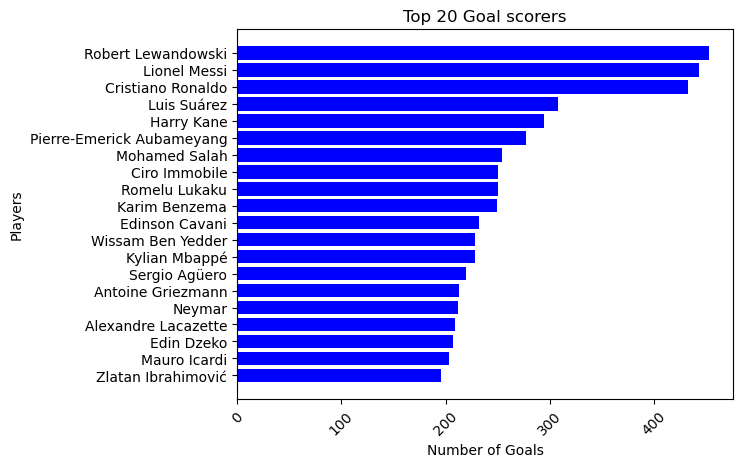

In [238]:
# Plotting the bar chart
sorted_data = golos_20.sort_values(by='total_goals', ascending=True)
plt.barh(sorted_data['player_name'], sorted_data['total_goals'], color='blue')
plt.xlabel('Number of Goals')
plt.ylabel('Players')
plt.title('Top 20 Goal scorers')
plt.xticks(rotation=45)
plt.show()

[Index](#back)

## 2.2 Top Assisters <a id='di'></a>

Let's check who's part of the 20 biggest assisters

In [239]:
assistencias_20 = presencas_novo.sort_values(by="total_assists", ascending=False).head(20)
assistencias_20

,player_name,total_goals,total_assists,total_yellow_cards,total_red_cards,total_minutes_played
12804,Lionel Messi,443,219,49,1,43543
11840,Kevin De Bruyne,117,195,48,0,35054
21105,Thomas Müller,166,190,26,1,34384
5883,Dusan Tadic,171,188,47,0,40523
23237,Ángel Di María,117,163,35,4,31286
13187,Luis Suárez,308,157,114,1,42668
16180,Neymar,212,143,93,2,28364
8549,Hakim Ziyech,114,135,54,0,29480
3847,Christian Eriksen,92,131,28,0,35309
5434,Dimitri Payet,96,128,55,3,29707


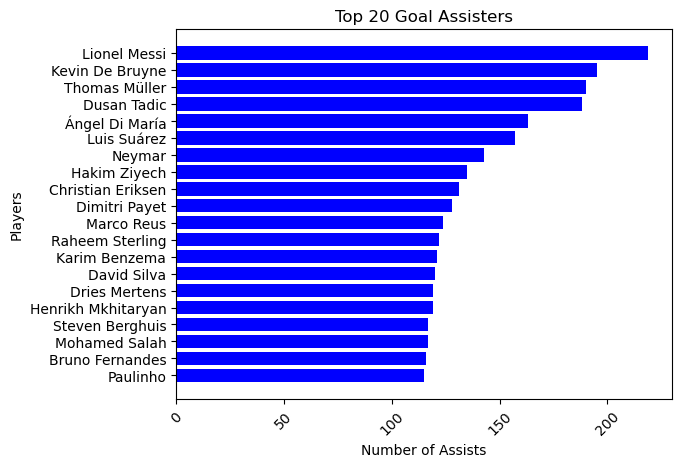

In [240]:
# Plotting the bar chart
sorted_data_assists = assistencias_20.sort_values(by='total_assists', ascending=True)
plt.barh(sorted_data_assists['player_name'], sorted_data_assists['total_assists'], color='blue')
plt.xlabel('Number of Assists')
plt.ylabel('Players')
plt.title('Top 20 Goal Assisters')
plt.xticks(rotation=45)
plt.show()

[Index](#back)

## 2.3 Contribution for Goal <a id='per'></a>

In [241]:
presencas_novo["total_goals_assists"] = presencas_novo["total_goals"] + presencas_novo["total_assists"]
presencas_novo_goals_assists = presencas_novo.sort_values(by="total_goals_assists", ascending=False).head(20)
presencas_novo_goals_assists['total_goals_assists'] = presencas_novo_goals_assists['total_goals_assists'].astype(str)

presencas_novo_goals_assists = presencas_novo_goals_assists.sort_values(by="total_goals_assists", ascending=True)
most_20_total_goals_assists = px.bar(presencas_novo_goals_assists, x=["total_goals", "total_assists"], y='player_name', orientation='h', title="Top 20 Players by Total Goal Contribution (Goals + Assists)" , text="total_goals_assists")
most_20_total_goals_assists.show()

[Index](#back)

## 2.4 Time needed to score a goal <a id='funil'></a>

In [242]:
presencas_novo_goals_assists.head()

,player_name,total_goals,total_assists,total_yellow_cards,total_red_cards,total_minutes_played,total_goals_assists
13935,Marco Reus,167,124,40,1,30913,291
5842,Dries Mertens,177,119,58,1,30477,296
22514,Wissam Ben Yedder,228,70,26,0,31960,298
5994,Edin Dzeko,207,100,60,2,34558,307
11840,Kevin De Bruyne,117,195,48,0,35054,312


In [243]:
presencas_novo_goals_assists['goal_per_minute'] = presencas_novo_goals_assists['total_minutes_played'] / presencas_novo_goals_assists['total_goals']
presencas_novo_goals_assists['goal_per_minute'] = presencas_novo_goals_assists['goal_per_minute'].round(2)
goals_minute = presencas_novo_goals_assists.sort_values(by="goal_per_minute", ascending=True).head(20)
goals_minute

,player_name,total_goals,total_assists,total_yellow_cards,total_red_cards,total_minutes_played,total_goals_assists,goal_per_minute
4264,Cristiano Ronaldo,432,114,64,4,41150,546,95.25
12804,Lionel Messi,443,219,49,1,43543,662,98.29
12318,Kylian Mbappé,228,97,40,1,23155,325,101.56
18599,Robert Lewandowski,453,111,53,1,46014,564,101.58
8635,Harry Kane,294,69,45,0,34993,363,119.02
17896,Pierre-Emerick Aubameyang,277,76,33,1,36593,353,132.10
4030,Ciro Immobile,250,66,71,2,33400,316,133.60
16180,Neymar,212,143,93,2,28364,355,133.79
13187,Luis Suárez,308,157,114,1,42668,465,138.53
11614,Karim Benzema,249,121,7,0,34639,370,139.11


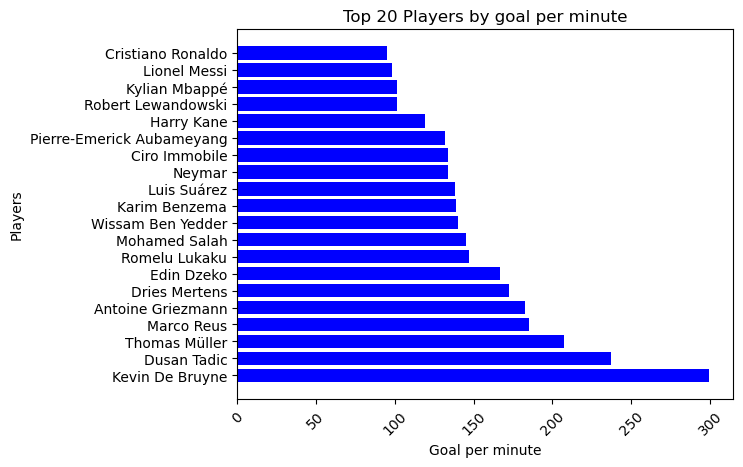

In [244]:
# Plotting the bar chart
sorted_data_ga = goals_minute.sort_values(by='goal_per_minute', ascending = False)
plt.barh(sorted_data_ga['player_name'], sorted_data_ga['goal_per_minute'], color='blue')
plt.xlabel('Goal per minute')
plt.ylabel('Players')
plt.title('Top 20 Players by goal per minute')
plt.xticks(rotation=45)
plt.show()

[Index](#back)

## 2.5 Time needed to assist <a id='tipos'></a>

In [245]:
presencas_novo_goals_assists['assist_per_minute'] = presencas_novo_goals_assists['total_minutes_played'] / presencas_novo_goals_assists['total_assists']
presencas_novo_goals_assists['assist_per_minute'] = presencas_novo_goals_assists['assist_per_minute'].round(2)
assist_minute = presencas_novo_goals_assists.sort_values(by="assist_per_minute", ascending=True).head(20)
assist_minute

,player_name,total_goals,total_assists,total_yellow_cards,total_red_cards,total_minutes_played,total_goals_assists,goal_per_minute,assist_per_minute
11840,Kevin De Bruyne,117,195,48,0,35054,312,299.61,179.76
21105,Thomas Müller,166,190,26,1,34384,356,207.13,180.97
16180,Neymar,212,143,93,2,28364,355,133.79,198.35
12804,Lionel Messi,443,219,49,1,43543,662,98.29,198.83
5883,Dusan Tadic,171,188,47,0,40523,359,236.98,215.55
12318,Kylian Mbappé,228,97,40,1,23155,325,101.56,238.71
13935,Marco Reus,167,124,40,1,30913,291,185.11,249.30
5842,Dries Mertens,177,119,58,1,30477,296,172.19,256.11
13187,Luis Suárez,308,157,114,1,42668,465,138.53,271.77
11614,Karim Benzema,249,121,7,0,34639,370,139.11,286.27


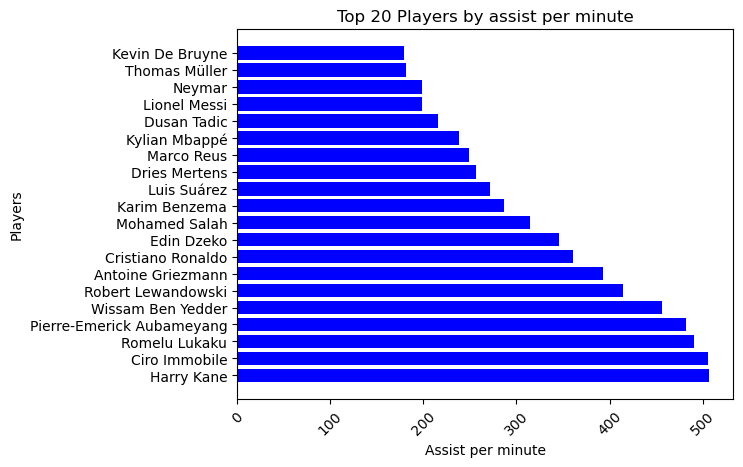

In [246]:
# Plotting the bar chart
sorted_data_a = assist_minute.sort_values(by='assist_per_minute', ascending = False)
plt.barh(sorted_data_a['player_name'], sorted_data_a['assist_per_minute'], color='blue')
plt.xlabel('Assist per minute')
plt.ylabel('Players')
plt.title('Top 20 Players by assist per minute')
plt.xticks(rotation=45)
plt.show()

[Index](#back)

## 2.6 Top 20 Players by Total Goal Contribution per minute (Goals + Assists) <a id='prox'></a>

In [247]:
presencas_novo_goals_assists["total_goals_assists_per_minute"] = presencas_novo_goals_assists["goal_per_minute"] + presencas_novo_goals_assists["assist_per_minute"]
presencas_novo_goals_assists = presencas_novo_goals_assists.sort_values(by="total_goals_assists_per_minute", ascending=False).head(20)
presencas_novo_goals_assists['total_goals_assists_per_minute'] = presencas_novo_goals_assists['total_goals_assists_per_minute'].astype(str)

presencas_novo_goals_assists = presencas_novo_goals_assists.sort_values(by="total_goals_assists_per_minute", ascending=False)
most_20_total_goals_assists_per_minute = px.bar(presencas_novo_goals_assists, x=["goal_per_minute", "assist_per_minute"], y='player_name', orientation='h', title="Top 20 Players by Total Goal Contribution per minute (Goals + Assists)" , text="total_goals_assists_per_minute")
most_20_total_goals_assists_per_minute.show()

In [248]:
#check which players are in the list of best goalscorers and assisters
merged_df = pd.merge(golos_20, assistencias_20, on='player_name', how='inner')
players_in_both = merged_df['player_name'].tolist()
players_in_both

['Lionel Messi', 'Luis Suárez', 'Mohamed Salah', 'Karim Benzema', 'Neymar']

After some studies and reading graphs we conclude that:

- The 3 best scorers are Robert Lewandowski, Lionel Messi and Cristiano Ronaldo.

- Of the twenty best goalscorers, all play forward.

- Only Messi, Suarez, Salah, Benzema and Neymar are both on the list of best scorer and assistant.

- Messi is the player who contributes the most to the goal (662 actions for a goal)

- Cristiano Ronaldo is the player who needs the least time to score a goal (95.25 minutes to score a goal. Almost 1 goal per game)

- Kevin De Bruyne needs only 179.76 minutes to make an assistance.

- Messi is the player who needs the least time to contribute to the goal.

- Despite being the player who needs the fewest minutes to score, Ronaldo needs an average of 456.21 minutes to contribute to the goal.

[Index](#back)

## 2.7 Players with most yellow cards <a id='aprox'></a>

In [249]:
amarelos_20 = presencas_novo.sort_values(by="total_yellow_cards", ascending=False).head(20)
amarelos_20

,player_name,total_goals,total_assists,total_yellow_cards,total_red_cards,total_minutes_played,total_goals_assists
4655,Danilo,106,70,201,4,80523,176
17554,Paulinho,166,115,180,4,71566,281
13851,Marcelo,52,72,172,8,76472,124
7058,Fernando,58,43,168,3,50717,101
19906,Sergio Ramos,70,19,140,6,36455,89
19877,Sergio Busquets,11,33,136,1,41597,44
6989,Felipe,20,9,133,7,38048,29
13957,Marco Verratti,10,51,128,1,26861,61
4411,Damián Suárez,6,22,123,3,26048,28
8299,Granit Xhaka,30,38,122,5,36790,68


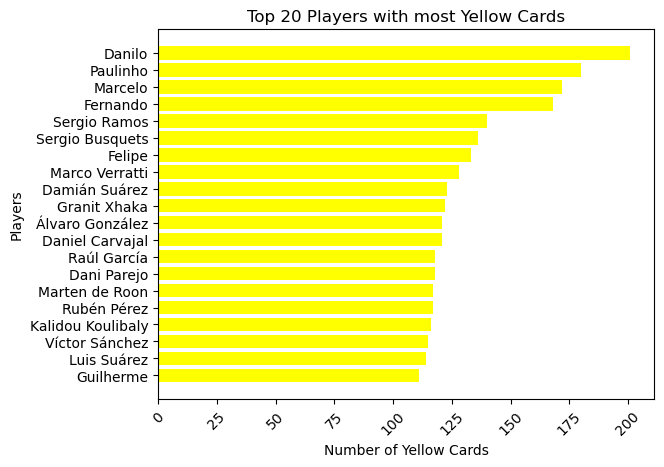

In [250]:
# Plotting the bar chart
sorted_data_yellow = amarelos_20.sort_values(by='total_yellow_cards', ascending=True)
plt.barh(sorted_data_yellow['player_name'], sorted_data_yellow['total_yellow_cards'], color='yellow')
plt.xlabel('Number of Yellow Cards')
plt.ylabel('Players')
plt.title('Top 20 Players with most Yellow Cards')
plt.xticks(rotation=45)
plt.show()

[Index](#back)

## 2.8 Players with most red cards <a id='do'></a>

In [251]:
vermelhos_20 = presencas_novo.sort_values(by="total_red_cards", ascending=False).head(20)
vermelhos_20

,player_name,total_goals,total_assists,total_yellow_cards,total_red_cards,total_minutes_played,total_goals_assists
13851,Marcelo,52,72,172,8,76472,124
6989,Felipe,20,9,133,7,38048,29
6876,Fallou Diagne,7,2,35,7,11718,9
22864,Younès Belhanda,62,58,77,6,24483,120
8808,Hilton,9,6,32,6,25446,15
14044,Mario Balotelli,113,20,90,6,17839,133
4508,Daniel Congré,10,7,32,6,24625,17
21607,Téji Savanier,40,36,34,6,13132,76
6949,Federico Fazio,24,6,55,6,26739,30
18110,Rafik Halliche,2,2,22,6,6665,4


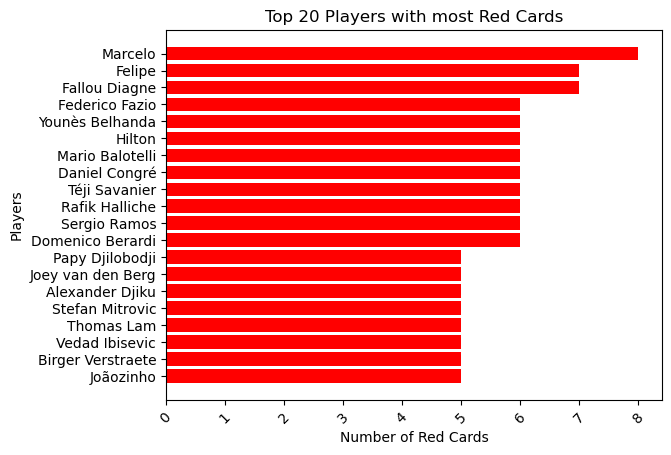

In [252]:
# Plotting the bar chart
sorted_data_red = vermelhos_20.sort_values(by='total_red_cards', ascending=True)
plt.barh(sorted_data_red['player_name'], sorted_data_red['total_red_cards'], color='red')
plt.xlabel('Number of Red Cards')
plt.ylabel('Players')
plt.title('Top 20 Players with most Red Cards')
plt.xticks(rotation=45)
plt.show()

[Index](#back)

## 2.9 Players with most cards (Yellow / Red) <a id='distr'></a>

In [253]:
presencas_novo['total_cards'] = presencas_novo['total_yellow_cards'] + presencas_novo['total_red_cards']
total_20 = presencas_novo.sort_values(by="total_cards", ascending=False).head(20)
total_20

,player_name,total_goals,total_assists,total_yellow_cards,total_red_cards,total_minutes_played,total_goals_assists,total_cards
4655,Danilo,106,70,201,4,80523,176,205
17554,Paulinho,166,115,180,4,71566,281,184
13851,Marcelo,52,72,172,8,76472,124,180
7058,Fernando,58,43,168,3,50717,101,171
19906,Sergio Ramos,70,19,140,6,36455,89,146
6989,Felipe,20,9,133,7,38048,29,140
19877,Sergio Busquets,11,33,136,1,41597,44,137
13957,Marco Verratti,10,51,128,1,26861,61,129
8299,Granit Xhaka,30,38,122,5,36790,68,127
4411,Damián Suárez,6,22,123,3,26048,28,126


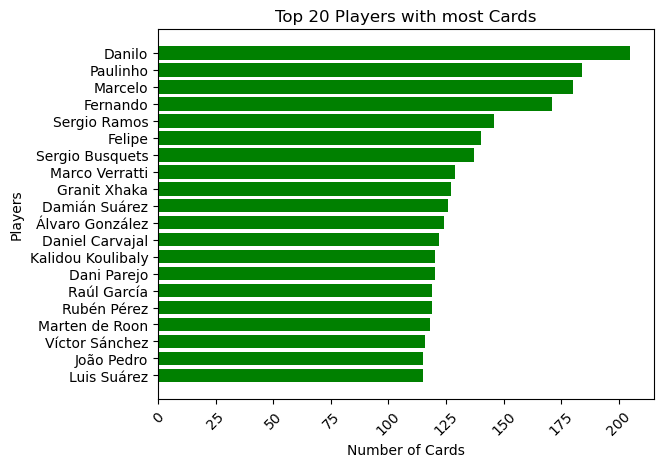

In [254]:
# Plotting the bar chart
sorted_data_total_cards = total_20.sort_values(by='total_cards', ascending=True)
plt.barh(sorted_data_total_cards['player_name'], sorted_data_total_cards['total_cards'], color='green')
plt.xlabel('Number of Cards')
plt.ylabel('Players')
plt.title('Top 20 Players with most Cards')
plt.xticks(rotation=45)
plt.show()

In [255]:
#check which players are in the list of best goalscorers and assisters
merged_cards = pd.merge(amarelos_20, vermelhos_20, on='player_name', how='inner')
players_in_both1 = merged_cards['player_name'].tolist()
players_in_both1

['Marcelo', 'Sergio Ramos', 'Felipe']

After analysing the graphs we can see that:

- Most of the players who appear in the graphs play in a more retreated part of the field (Defenders, Defensive Midfield)

- Luis Suarez who is a forward, surprisingly figures on the list of players with more yellows

- Only 3 players appear in the top 20 of players with more yellow and red cards given.

[Index](#back)

# 3. Contribution per year of the 3 best players (Goals / Assists) <a id='dia'></a>

In this topic I will compare how was the contribution to goal over the years of Ronaldo, Messi and Lewandowski.

In [256]:
presencas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524125 entries, 0 to 1524125
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   appearance_id           1524125 non-null  object        
 1   game_id                 1524125 non-null  int64         
 2   player_id               1524125 non-null  int64         
 3   player_club_id          1524125 non-null  int64         
 4   player_current_club_id  1524125 non-null  int64         
 5   date                    1524125 non-null  datetime64[ns]
 6   player_name             1524125 non-null  category      
 7   competition_id          1524125 non-null  category      
 8   yellow_cards            1524125 non-null  int64         
 9   red_cards               1524125 non-null  int64         
 10  goals                   1524125 non-null  int64         
 11  assists                 1524125 non-null  int64         
 12  minutes_played

In [257]:
presencas["year"] = presencas["date"].dt.year
presencas["month"] = presencas["date"].dt.month

In [258]:
presencas.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,year,month
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,2012,7
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90,2012,7
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45,2012,7
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90,2012,7
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90,2012,7


In [259]:
presencas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524125 entries, 0 to 1524125
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   appearance_id           1524125 non-null  object        
 1   game_id                 1524125 non-null  int64         
 2   player_id               1524125 non-null  int64         
 3   player_club_id          1524125 non-null  int64         
 4   player_current_club_id  1524125 non-null  int64         
 5   date                    1524125 non-null  datetime64[ns]
 6   player_name             1524125 non-null  category      
 7   competition_id          1524125 non-null  category      
 8   yellow_cards            1524125 non-null  int64         
 9   red_cards               1524125 non-null  int64         
 10  goals                   1524125 non-null  int64         
 11  assists                 1524125 non-null  int64         
 12  minutes_played

In [261]:
presencas.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,year,month
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90,2012,7
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90,2012,7
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45,2012,7
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90,2012,7
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90,2012,7


In [262]:
lewa_present = "Robert Lewandowski" in presencas["player_name"].unique()
lewa_present

True

In [263]:
messi_present = "Lionel Messi" in presencas["player_name"].unique()
messi_present

True

In [264]:
ronaldo_present = "Cristiano Ronaldo" in presencas["player_name"].unique()
ronaldo_present

True

In [289]:
result = presencas.groupby(["player_name", "year"])[["goals", "assists"]].agg("sum").reset_index()
# Add a column for the total contribution (goals + assists)
result["contribution"] = result["goals"] + result["assists"]
result

,player_name,year,goals,assists,contribution
0,A.J. Soares,2012,0,0,0
1,A.J. Soares,2013,0,0,0
2,A.J. Soares,2014,0,0,0
3,A.J. Soares,2015,0,0,0
4,A.J. Soares,2016,1,0,1
...,...,...,...,...,...
303714,Αbdul Razak,2020,0,0,0
303715,Αbdul Razak,2021,0,0,0
303716,Αbdul Razak,2022,0,0,0
303717,Αbdul Razak,2023,0,0,0


In [291]:
nomes_desejados = ["Lionel Messi", "Robert Lewandowski", "Cristiano Ronaldo"]

# Filtering the result only for the 3 desired names
result_filtered = result[result["player_name"].isin(nomes_desejados)]
result_filtered

,player_name,year,goals,assists,contribution
55432,Cristiano Ronaldo,2012,23,4,27
55433,Cristiano Ronaldo,2013,59,17,76
55434,Cristiano Ronaldo,2014,56,21,77
55435,Cristiano Ronaldo,2015,54,18,72
55436,Cristiano Ronaldo,2016,42,14,56
55437,Cristiano Ronaldo,2017,42,9,51
55438,Cristiano Ronaldo,2018,43,12,55
55439,Cristiano Ronaldo,2019,25,5,30
55440,Cristiano Ronaldo,2020,41,6,47
55441,Cristiano Ronaldo,2021,34,6,40


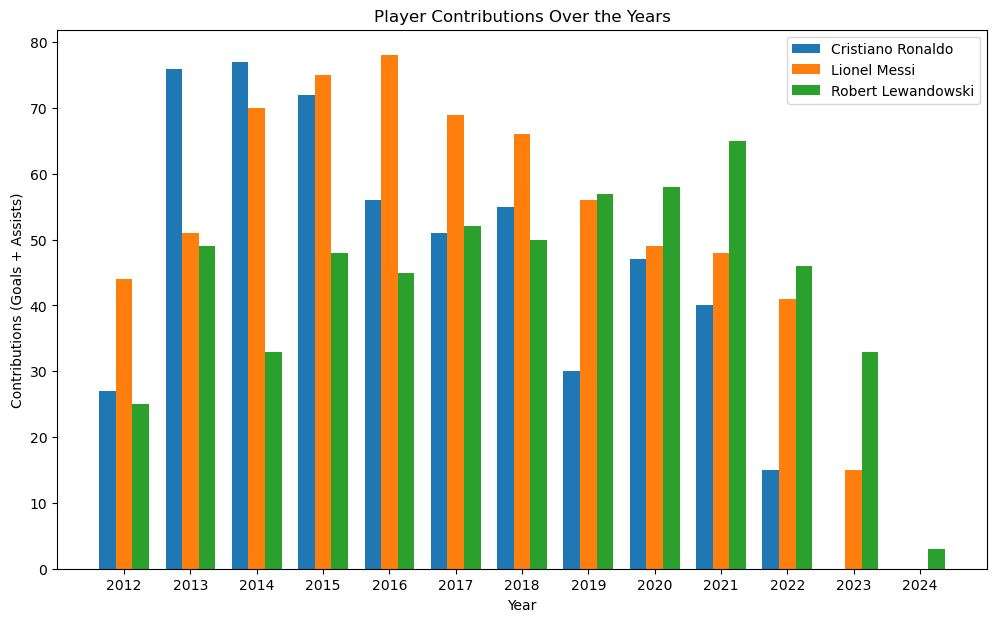

In [287]:
data = {
    "Cristiano Ronaldo": {
        "years": [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
        "contributions": [27, 76, 77, 72, 56, 51, 55, 30, 47, 40, 15, 0, 0],
    },
    "Lionel Messi": {
        "years": [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
        "contributions": [44, 51, 70, 75, 78, 69, 66, 56, 49, 48, 41, 15, 0],
    },
    "Robert Lewandowski": {
        "years": [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
        "contributions": [25, 49, 33, 48, 45, 52, 50, 57, 58, 65, 46, 33, 3],
    }
}

# Plotting the data
bar_width = 0.25
index = np.arange(len(data["Cristiano Ronaldo"]["years"]))

fig, ax = plt.subplots(figsize=(12, 7))

# Bar for Cristiano Ronaldo
bar1 = ax.bar(index - bar_width, data["Cristiano Ronaldo"]["contributions"], bar_width, label='Cristiano Ronaldo')

# Bar for Lionel Messi
bar2 = ax.bar(index, data["Lionel Messi"]["contributions"], bar_width, label='Lionel Messi')

# Bar for Robert Lewandowski
bar3 = ax.bar(index + bar_width, data["Robert Lewandowski"]["contributions"], bar_width, label='Robert Lewandowski')

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Contributions (Goals + Assists)')
ax.set_title('Player Contributions Over the Years')
ax.set_xticks(index)
ax.set_xticklabels(data["Cristiano Ronaldo"]["years"])
ax.legend()

# Display the plot
plt.show()

Starting with the year 2023 and 2024, I believe that Ronaldo doesn't have statistics because we don't have Saudi Arabian's statistics, same happens to Messi and MLS.

This graph shows the goal contribution these 3 players had over the years. 
Note that Lewandowski had more contributions for goal when Ronaldo and Messi started to slow down.
If it was for total goals I believe Cristiano would be top more times than just 2.
Messi tops with 78 contributions in the year 2016 followed by Ronaldo in 2014 with 77 and 76 in 2013.

[Index](#back)

# 4. Sporting Clube de Portugal <a id='ab'></a>

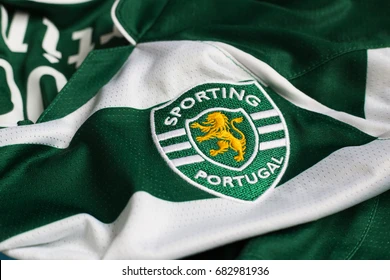

I'm going to talk a little about Sporting Clube de Portugal. In this project I'm not going to stretch much but in a next project I want to talk more about Sporting and the Portuguese League. In this analysis I will only talk about the market value of Sporting players, and what's the assistance of the team's games in recent years.

# 4.1 Average stadium assistance 2012-2023 <a id='sp'></a>

In [267]:
jogos.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2321044,L1,2013,2. Matchday,2013-08-18,16,23,2,1,1.0,...,SIGNAL IDUNA PARK,80200.0,Peter Sippel,https://www.transfermarkt.co.uk/borussia-dortm...,4-2-3-1,4-3-2-1,Borussia Dortmund,Eintracht Braunschweig,2:1,domestic_league
1,2321060,L1,2013,3. Matchday,2013-08-25,23,24,0,2,18.0,...,EINTRACHT-Stadion,23325.0,Wolfgang Stark,https://www.transfermarkt.co.uk/eintracht-brau...,4-3-2-1,4-2-3-1,Eintracht Braunschweig,Eintracht Frankfurt Fußball AG,0:2,domestic_league
2,2321086,L1,2013,6. Matchday,2013-09-21,4,16,1,1,15.0,...,Max-Morlock-Stadion,50000.0,Knut Kircher,https://www.transfermarkt.co.uk/1-fc-nuremberg...,4-2-3-1,4-2-3-1,1.FC Nuremberg,Borussia Dortmund,1:1,domestic_league
3,2321152,L1,2013,11. Matchday,2013-11-02,44,33,0,2,7.0,...,Olympiastadion Berlin,69277.0,Günter Perl,https://www.transfermarkt.co.uk/hertha-bsc_fc-...,4-2-3-1,4-2-3-1,Hertha BSC,FC Schalke 04,0:2,domestic_league
4,2321205,L1,2013,17. Matchday,2013-12-21,41,39,2,3,14.0,...,Volksparkstadion,50000.0,Bastian Dankert,https://www.transfermarkt.co.uk/hamburger-sv_1...,4-2-3-1,4-4-2 Diamond,Hamburger SV,1. Fußball- und Sportverein Mainz 05,2:3,domestic_league


In [268]:
sporting_home = jogos[jogos['home_club_name'] == 'Sporting Clube de Portugal']
sporting_home.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
1398,2495298,CL,2014,Group G,2014-09-30,336,631,0,1,NaN,...,Estádio José Alvalade XXI,40734.0,Mateu Lahoz,https://www.transfermarkt.co.uk/spielbericht/i...,4-3-3 Attacking,4-2-3-1,Sporting Clube de Portugal,Chelsea Football Club,0:1,international_cup
1405,2526197,PO1,2014,26. Matchday,2015-03-22,336,2420,4,1,3.0,...,Estádio José Alvalade XXI,35979.0,Jorge Sousa,https://www.transfermarkt.co.uk/sporting-cp_vi...,4-3-3 Attacking,4-3-3 Defending,Sporting Clube de Portugal,Vitória Sport Clube,4:1,domestic_league
1419,2596940,PO1,2015,2. Matchday,2015-08-22,336,2995,1,1,5.0,...,Estádio José Alvalade XXI,40639.0,Manuel Oliveira,https://www.transfermarkt.co.uk/sporting-cp_fc...,4-4-2 double 6,4-2-3-1,Sporting Clube de Portugal,FC Paços de Ferreira,1:1,domestic_league
1442,2720784,PO1,2016,4. Matchday,2016-09-10,336,979,3,0,1.0,...,Estádio José Alvalade XXI,44393.0,Nuno Almeida,https://www.transfermarkt.co.uk/sporting-cp_mo...,4-4-2 double 6,4-3-3 Attacking,Sporting Clube de Portugal,Moreirense Futebol Clube,3:0,domestic_league
1456,2883759,PO1,2017,13. Matchday,2017-12-01,336,68608,1,0,2.0,...,Estádio José Alvalade XXI,46881.0,Nuno Almeida,https://www.transfermarkt.co.uk/sporting-cp_cf...,4-4-2 Diamond,4-4-2 double 6,Sporting Clube de Portugal,CF Os Belenenses,1:0,domestic_league


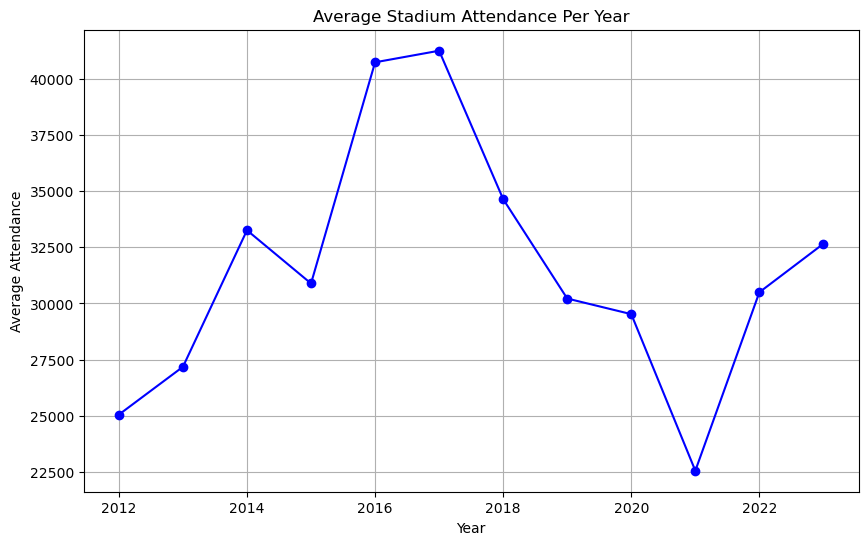

In [283]:
plt.figure(figsize=(10, 6))
plt.plot(average_attendance_per_year, marker='o', linestyle='-', color='b')
plt.title('Average Stadium Attendance Per Year')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.grid(True)
plt.show()

Much can be said about this graph and why so much fluctuation in the average of assistance over the years.

Starting with the year 2012 and 2013, the average of assistance is relatively low because it coincides with Sporting's worst ranking ever in the Portuguese championship, they were seventh that year. The following year there is an increase because with the entry of a new president and some investment in the team allied with good results caused the average of assistance to increase, the same happened in 2015, although there was less assistance compared to the last year.

The 2016 boom is clearly influenced by the signing of Jorge Jesus the main rival's coach, good results, broke the record of points in the championship but still were not champions, finishing in second. The following year, champions league and good performance in the league kept the average of assists very high.

The fall in the following years is due to an attack that took place at Sporting's training centre, which caused many of the players to terminate their contract so that Sporting did not receive any value for many of the club's great assets. The investment was not the best, Sporting was in crisis, people didn't believe that Sporting wouln'd be good that year and it was reflected on assistance.

The year 2021 was the year in which Sporting won the championship again, but the games were played behind closed doors because of the pandemic.

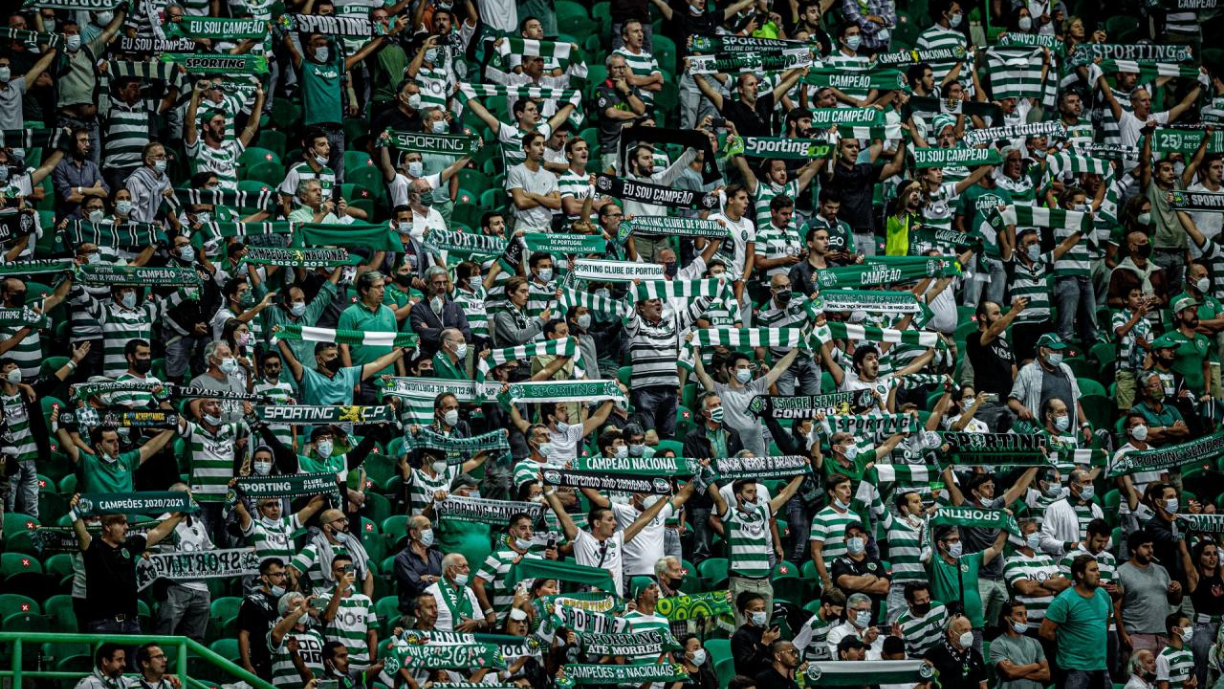

[Index](#back)

## 4.2 Players Market Value 2023 <a id='scp'></a>

In [284]:
jogadores.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,date,year
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,2012-08-05,2012
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0,2012-08-05,2012
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,2012-08-05,2012
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0,2012-08-05,2012
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0,2012-08-05,2012


In [275]:
jogadores['year'] = jogadores['date'].dt.year

In [276]:
sporting_players = jogadores[jogadores['current_club_name'] == 'Sporting Clube de Portugal']
sporting_players.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,date,year
427,5404,Jérémy,Mathieu,Jérémy Mathieu,2019,336,jeremy-mathieu,France,Luxeuil-les-Bains,France,...,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jeremy-mathieu...,PO1,Sporting Clube de Portugal,1200000.0,15000000.0,2012-08-19,2012
2284,27303,NaN,Gerson Magrão,Gerson Magrão,2013,336,gerson-magrao,Brazil,Diadema,Brazil,...,NaN,GP Sports,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/gerson-magrao/...,PO1,Sporting Clube de Portugal,200000.0,4000000.0,2012-11-25,2012
2289,27346,NaN,Marcelo Boeck,Marcelo Boeck,2015,336,marcelo-boeck,Brazil,Santa Cruz,Brazil,...,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/marcelo-boeck/...,PO1,Sporting Clube de Portugal,200000.0,1800000.0,2012-11-25,2012
3375,39642,Bryan,Ruiz,Bryan Ruiz,2017,336,bryan-ruiz,Costa Rica,San José,Costa Rica,...,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/bryan-ruiz/pro...,PO1,Sporting Clube de Portugal,150000.0,13000000.0,2013-04-21,2013
3743,44062,Antonio,Adán,Antonio Adán,2023,336,antonio-adan,Spain,Madrid,Spain,...,2024-06-30 00:00:00,Gesport Espizua SL,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/antonio-adan/p...,PO1,Sporting Clube de Portugal,800000.0,8000000.0,2012-07-22,2012


In [277]:
jogadores['last_season'] = pd.to_datetime(jogadores['last_season'], format='%Y')

jogadores['last_season'] = jogadores['last_season'].dt.year

sporting_players_2023 = sporting_players[sporting_players['last_season'] == 2023]
sporting_players_2023

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,date,year
3743,44062,Antonio,Adán,Antonio Adán,2023,336,antonio-adan,Spain,Madrid,Spain,...,2024-06-30 00:00:00,Gesport Espizua SL,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/antonio-adan/p...,PO1,Sporting Clube de Portugal,800000.0,8000000.0,2012-07-22,2012
4819,56036,Luís,Neto,Luís Neto,2023,336,luis-neto,Portugal,Póvoa do Varzim,Portugal,...,2024-06-30 00:00:00,Team of Future,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/luis-neto/prof...,PO1,Sporting Clube de Portugal,300000.0,6000000.0,2012-10-20,2012
7900,102427,Sebastián,Coates,Sebastián Coates,2023,336,sebastian-coates,Uruguay,Montevideo,Uruguay,...,2024-06-30 00:00:00,InterLex Sport,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sebastian-coat...,PO1,Sporting Clube de Portugal,4000000.0,15000000.0,2012-11-11,2012
9702,139395,Ricardo,Esgaio,Ricardo Esgaio,2023,336,ricardo-esgaio,Portugal,Nazaré,Portugal,...,2026-06-30 00:00:00,Proeleven S.A.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ricardo-esgaio...,PO1,Sporting Clube de Portugal,3500000.0,6000000.0,2013-03-09,2013
13063,211072,NaN,Paulinho,Paulinho,2023,336,paulinho,Portugal,Barcelos,Portugal,...,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/paulinho/profi...,PO1,Sporting Clube de Portugal,6500000.0,15000000.0,2013-05-16,2013
16488,288253,Jerry,St. Juste,Jerry St. Juste,2023,336,jerry-st-juste,Netherlands,Groningen,Netherlands,...,2026-06-30 00:00:00,St. Juste Management,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jerry-st-juste...,PO1,Sporting Clube de Portugal,8000000.0,16000000.0,2012-09-22,2012
16624,290391,Nuno,Santos,Nuno Santos,2023,336,nuno-santos,Portugal,Trofa,Portugal,...,2027-06-30 00:00:00,Jorge Pires,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nuno-santos/pr...,PO1,Sporting Clube de Portugal,12000000.0,14000000.0,2012-10-06,2012
17431,314367,Marcus,Edwards,Marcus Edwards,2023,336,marcus-edwards,England,London,England,...,2026-06-30 00:00:00,ARETÉ,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/marcus-edwards...,PO1,Sporting Clube de Portugal,28000000.0,30000000.0,2012-11-24,2012
17888,325443,Viktor,Gyökeres,Viktor Gyökeres,2023,336,viktor-gyokeres,Sweden,Stockholm,Sweden,...,2028-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/viktor-gyokere...,PO1,Sporting Clube de Portugal,45000000.0,45000000.0,2013-03-02,2013
20076,379249,NaN,Matheus Reis,Matheus Reis,2023,336,matheus-reis,Brazil,São João da Boa Vista,Brazil,...,2025-06-30 00:00:00,ADM Esporte,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/matheus-reis/p...,PO1,Sporting Clube de Portugal,8000000.0,8000000.0,2013-04-03,2013


In [278]:
sporting_players_2023['market_value_in_million'] = sporting_players_2023['market_value_in_eur'] / 1e6
sporting_players_2023

/var/folders/d2/pwql6b_j2sjbv968h9tr70_h0000gn/T/ipykernel_60628/329111145.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,date,year,market_value_in_million
3743,44062,Antonio,Adán,Antonio Adán,2023,336,antonio-adan,Spain,Madrid,Spain,...,Gesport Espizua SL,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/antonio-adan/p...,PO1,Sporting Clube de Portugal,800000.0,8000000.0,2012-07-22,2012,0.800
4819,56036,Luís,Neto,Luís Neto,2023,336,luis-neto,Portugal,Póvoa do Varzim,Portugal,...,Team of Future,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/luis-neto/prof...,PO1,Sporting Clube de Portugal,300000.0,6000000.0,2012-10-20,2012,0.300
7900,102427,Sebastián,Coates,Sebastián Coates,2023,336,sebastian-coates,Uruguay,Montevideo,Uruguay,...,InterLex Sport,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sebastian-coat...,PO1,Sporting Clube de Portugal,4000000.0,15000000.0,2012-11-11,2012,4.000
9702,139395,Ricardo,Esgaio,Ricardo Esgaio,2023,336,ricardo-esgaio,Portugal,Nazaré,Portugal,...,Proeleven S.A.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ricardo-esgaio...,PO1,Sporting Clube de Portugal,3500000.0,6000000.0,2013-03-09,2013,3.500
13063,211072,NaN,Paulinho,Paulinho,2023,336,paulinho,Portugal,Barcelos,Portugal,...,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/paulinho/profi...,PO1,Sporting Clube de Portugal,6500000.0,15000000.0,2013-05-16,2013,6.500
16488,288253,Jerry,St. Juste,Jerry St. Juste,2023,336,jerry-st-juste,Netherlands,Groningen,Netherlands,...,St. Juste Management,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jerry-st-juste...,PO1,Sporting Clube de Portugal,8000000.0,16000000.0,2012-09-22,2012,8.000
16624,290391,Nuno,Santos,Nuno Santos,2023,336,nuno-santos,Portugal,Trofa,Portugal,...,Jorge Pires,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/nuno-santos/pr...,PO1,Sporting Clube de Portugal,12000000.0,14000000.0,2012-10-06,2012,12.000
17431,314367,Marcus,Edwards,Marcus Edwards,2023,336,marcus-edwards,England,London,England,...,ARETÉ,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/marcus-edwards...,PO1,Sporting Clube de Portugal,28000000.0,30000000.0,2012-11-24,2012,28.000
17888,325443,Viktor,Gyökeres,Viktor Gyökeres,2023,336,viktor-gyokeres,Sweden,Stockholm,Sweden,...,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/viktor-gyokere...,PO1,Sporting Clube de Portugal,45000000.0,45000000.0,2013-03-02,2013,45.000
20076,379249,NaN,Matheus Reis,Matheus Reis,2023,336,matheus-reis,Brazil,São João da Boa Vista,Brazil,...,ADM Esporte,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/matheus-reis/p...,PO1,Sporting Clube de Portugal,8000000.0,8000000.0,2013-04-03,2013,8.000


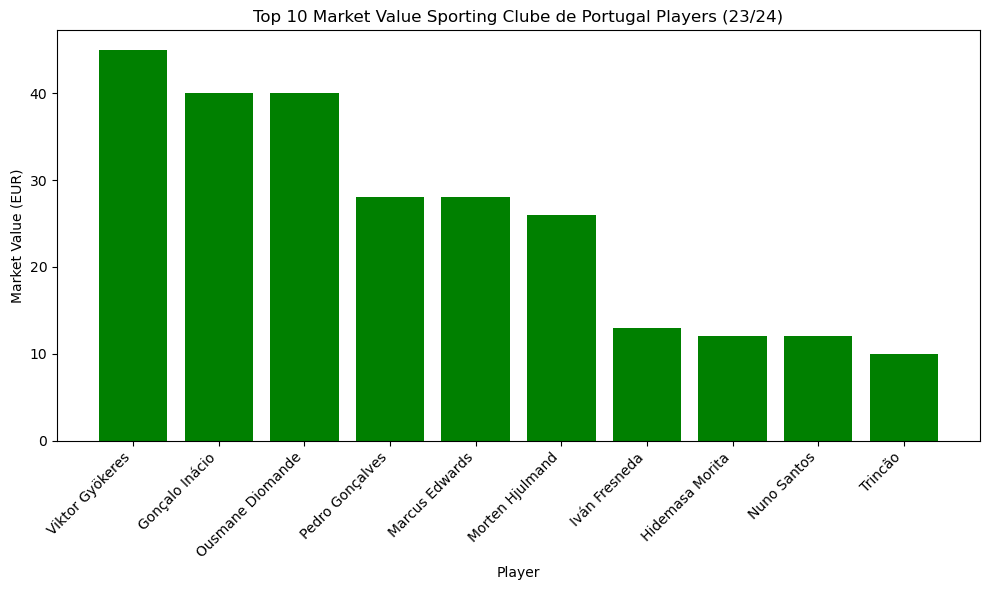

In [286]:
jogadores_sorted = sporting_players_2023.sort_values(by='market_value_in_million', ascending=False).head(10)

# Creating graph
plt.figure(figsize=(10, 6))
plt.bar(jogadores_sorted['name'], jogadores_sorted['market_value_in_million'], color='green')
plt.xlabel('Player')
plt.ylabel('Market Value (EUR)')
plt.title('Top 10 Market Value Sporting Clube de Portugal Players (23/24)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In the graph we can see that Viktor Gyokeres is the most 'valuable' player of Sporting followed by Goncalo Igacio and Diomande.
Gyokeres is the highest purchase of Sporting of all time and his performance during this season makes him the most valuable player of Sporting at the moment.

Of this top 3 only Gyokeres plays in the attack, Inacio and Diomande play as defenders.

[Index](#back)

# 5. Conclusion <a id='final'></a>

The purpose of our analyse was to verify:

- Who are the 20 players that scored more goals

- Who are the 20 players that assisted more times

- Who has more contribution to goals

- Who are the 20 players that need less time to score a goal

- Who are the 20 players that need less time to assist someone to score

- Top 20 players that got more yellow cards

- Top 20 players that got more red cards

- Top 20 players with more card combination.

I started by importing the libraries, I found that there was a lot of missing data in some tables but as this data would not interfere with my study I decided not to change anything.

After changing some data, I started by doing my analyses.

- I found that Lewandowski was the player with the highest number of goals (maybe because our database did not have records of the Arab league and MLS, which certainly influenced the study).

    - Lewandowski - 453 Goals
    - Messi - 443 Goals
    - Ronaldo - 432 Goals

Note( Lewandowski has a total of 46014min, Messi 43543min and Ronaldo 41150min)

- Messi was the player with the most assists, followed by De Bruyne and Muller

    - Messi - 219 Assistants
    - De Bruyne - 195 Assistants
    - Muller - 190 Assistants

Note( Messi has a total of 43543min, De Bruyne 35054min and Muller 34384min)

The number of minutes played certainly affects the data a lot.


- Messi, Lewandowski and Ronaldo were the players who contributed the most to the goal:

    - Messi - 662 (443G/219A)
    - Lewandowski - 564(453G/111A)
    - Ronaldo - 546(432G/114A)

- Ronaldo, Messi and Mbappe are the players who need less time to score a goal:

    - Ronaldo - 95,26min
    - Messi - 98.29min
    - Mbappe - 101.56

- De Bruyne, Muller and Neymar Jr. are the players who need the least time to make an assist:

    - De Bruyne - 179.76min
    - Muller - 180.97min
    - Neymar Jr. - 198.35min

- Speaking of contribution per minute, Messi, Neymar and Kylian Mbappe are the players who need fewer minutes on average to contribute to goal (goal/assist):

    - Messi - 297.12min
    - Neymar Jr. - 332.14min
    - Mbappe - 340.27min

In a second part, I studied which players had the most yellow, red and total cards.

- I noticed that Danilo, Paulinho and Marcelo, all Brazilian players, saw more yellow cards.They're also top 3 of on sum of yellow and red cards.

- Marcelo, Felipe and Diagne were the players who saw the most red cards.

I filtered the 3 players that contributed the most for goals and assists over the years.
Lewandowski, Messi and Ronaldo were the top 3 players that contributed the most, so I wanted to draw a graph that could show how they've done it over the years.
I could see that in the first half of the years, records were broken by Ronaldo and Messi but over the years Lewandowski started to take the lead.

- The peaks are:

    - Messi tops with 78 contributions in the year 2016. 
    - Ronaldo with 77 contributions in 2014. 
    - Ronaldo with 76 contributions in 2013.

To finish my study, I spoke a little about Sporting, I saw that Sporting's stadium had the highest attendance in 2017 with an average of more than 40k people per game and a lowest attendance during Covid-19 pandemic where there were a lot of games without supporters in the stadium.
Vyktor Gyokeres , Goncalo Inacio and Diomande are the players with highest value in the market at the moment.

[Index](#back)